**Assignment on Classification**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the Iris dataset
iris=pd.read_excel('/content/iris.xls')

In [ ]:
#Showing the first 5 observations
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#To find the number of observations and variables
iris.shape

(150, 5)

There are 150 observations and 5 variables

In [ ]:
#Understanding the structure of dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Number of null values
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Out of the 5 variables four are numerical and "Classification" is categorical. There are null values present in SL,SW and PL.

Now we need to treat the null values in SL,SW and PL

In [ ]:
#Now we need to treat the missing values Find the categories in the categorical variable
iris['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

Since there is a categorical variable group by classification then plot the histogram and replace the missing values with appropriate values.

In [ ]:
iris[iris['Classification']=='Iris-setosa'][['SL','SW','PL']].isna().sum()

SL    3
SW    3
PL    2
dtype: int64

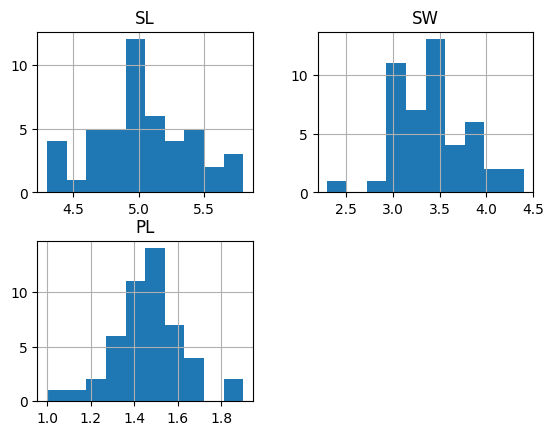

In [ ]:
iris[iris['Classification']=='Iris-setosa'][['SL','SW','PL']].hist()
plt.show()

In [ ]:
iris[iris['Classification']=='Iris-setosa'][['SL','SW','PL']].skew()


SL    0.111207
SW    0.173348
PL    0.007254
dtype: float64

The Histogram for the category Iris-setosa and the skew value for SL,SW and PL indicate they are normal so we can replace the missing value with mean of the observations

In [ ]:
iris[iris['Classification']=='Iris-setosa'].mean()

<ipython-input-188-2da50be91c19>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris[iris['Classification']=='Iris-setosa'].mean()


SL    5.008511
SW    3.408511
PL    1.468750
PW    0.244000
dtype: float64

In [ ]:
ir1=iris[iris['Classification']=='Iris-setosa'].fillna(value=iris[iris['Classification']=='Iris-setosa'][['SL','SW','PL']].mean())

In [ ]:
ir1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
iris[iris['Classification']=='Iris-versicolor'][['SL','SW','PL']].isna().sum()

SL    2
SW    2
PL    2
dtype: int64

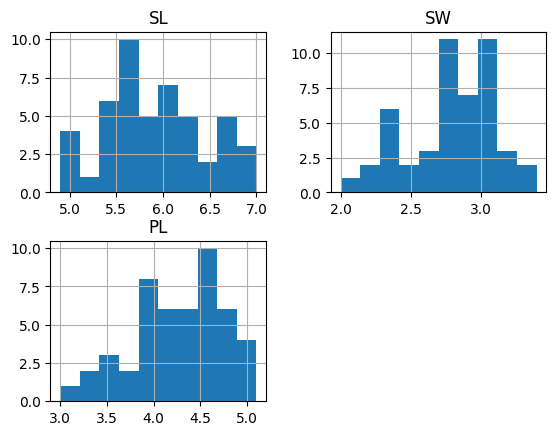

In [ ]:
iris[iris['Classification']=='Iris-versicolor'][['SL','SW','PL']].hist()
plt.show()

In [ ]:
iris[iris['Classification']=='Iris-versicolor'][['SL','SW','PL']].skew()

SL    0.156444
SW   -0.457333
PL   -0.577363
dtype: float64

From the histogram and skewness value SL and SW are symmetric and nearly normally distributed so we replace unknown values in SL and SW with mean. The PL is skewsymmetric so replace it with median values.

In [ ]:
repl_val={'SL':iris[iris['Classification']=='Iris-versicolor']['SL'].mean(),'SW':iris[iris['Classification']=='Iris-versicolor']['SW'].mean(),'PL':iris[iris['Classification']=='Iris-versicolor']['PL'].median()}
ir2=iris[iris['Classification']=='Iris-versicolor'].fillna(value=repl_val)

In [ ]:
ir2.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
iris[iris['Classification']=='Iris-virginica'][['SL','SW','PL']].isna().sum()

SL    2
SW    1
PL    2
dtype: int64

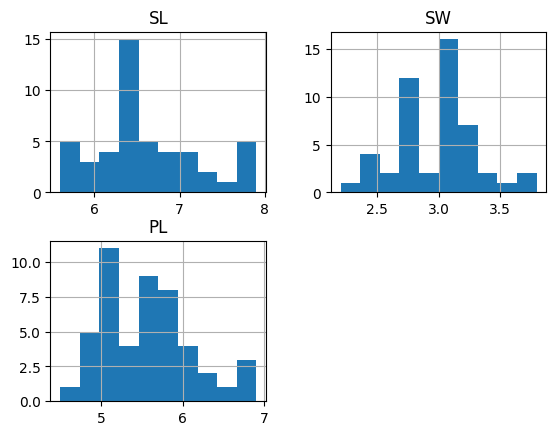

In [ ]:
iris[iris['Classification']=='Iris-virginica'][['SL','SW','PL']].hist()
plt.show()

In [ ]:
iris[iris['Classification']=='Iris-virginica'][['SL','SW','PL']].skew()

SL    0.493174
SW    0.416486
PL    0.570267
dtype: float64

Replace SW with mean and SL ,PL with median

In [ ]:
repl_vale={'SL':iris[iris['Classification']=='Iris-virginica']['SL'].median(),'SW':iris[iris['Classification']=='Iris-virginica']['SW'].mean(),'PL':iris[iris['Classification']=='Iris-virginica']['PL'].median()}
ir3=iris[iris['Classification']=='Iris-virginica'].fillna(value=repl_vale)

In [ ]:
ir3.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
iris=pd.concat([ir1,ir2,ir3])

In [ ]:
iris

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,Iris-setosa
1,4.900000,3.0,1.40,0.2,Iris-setosa
2,5.008511,3.2,1.30,0.2,Iris-setosa
3,4.600000,3.1,1.50,0.2,Iris-setosa
4,5.000000,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,Iris-virginica
146,6.300000,2.5,5.00,1.9,Iris-virginica
147,6.500000,3.0,5.55,2.0,Iris-virginica
148,6.200000,3.4,5.40,2.3,Iris-virginica


In [ ]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<ipython-input-204-207f17448ceb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True)


<Axes: >

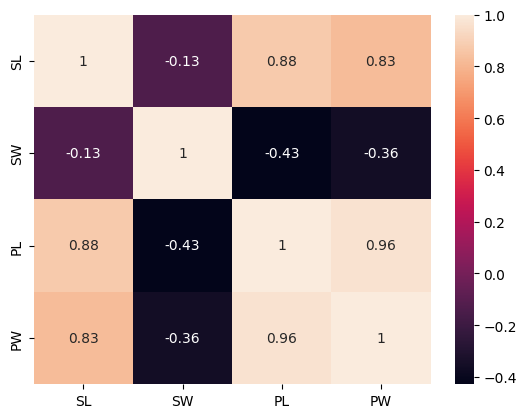

In [ ]:
#Correlation Coefficient
sns.heatmap(iris.corr(),annot=True)

SL is highly correlated to PW and PL

PL is highly correlated to PW and SL

PW is highly correlated to SL and PL

# **Logistic Regression**

In [ ]:
x=iris.drop(['Classification'],axis=1)

In [ ]:
y=iris['Classification']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Assuming 'data' is your dataset and 'target' is your target variable
x_train, x_test, y_train, y_test = train_test_split( x, y, stratify=y, test_size=0.2 )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
log_reg=LogisticRegression(solver='lbfgs')
log_reg = OneVsRestClassifier(log_reg)

In [ ]:
log_reg.fit(x_train,y_train)
log_pred=log_reg.predict(x_test)

In [ ]:
log_pred

array([0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 0, 0, 0, 2, 1, 2])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

In [ ]:
confusion_matrix(y_test,log_pred)

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]])

In [ ]:
log_reg.score(x_test,y_test)

0.9333333333333333

In [ ]:
print("Accuracy:" , accuracy_score(y_test,log_pred))
print("Precision:",precision_score(y_test,log_pred,average='macro'))
print("recall:",recall_score(y_test,log_pred,average='macro'))
print("F1",f1_score(y_test,log_pred,average='macro'))

Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
recall: 0.9333333333333332
F1 0.9326599326599326


In [ ]:
print("Accuracy:" , accuracy_score(y_test,log_pred))
print("Precision:",precision_score(y_test,log_pred,average='micro'))
print("recall:",recall_score(y_test,log_pred,average='micro'))
print("F1",f1_score(y_test,log_pred,average='micro'))

Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
recall: 0.9333333333333333
F1 0.9333333333333333


# KNN

In [ ]:
#Finding Optimal number of neighbours
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,25)

In [ ]:
#Creating a loop to find accuracy of each number of neighbours
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
  classifier.fit(x_train,y_train)
  knn_pred=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'Metric k')

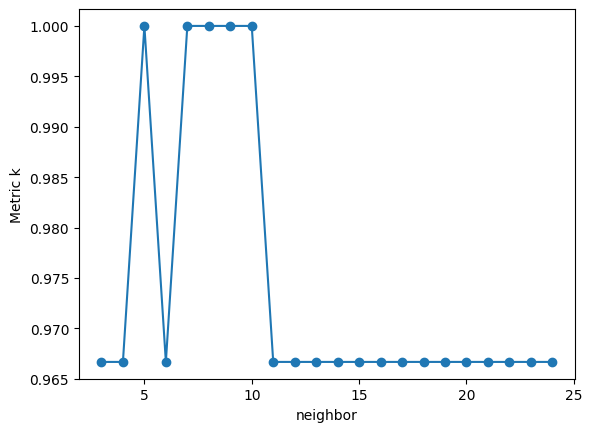

In [ ]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel("neighbor")
plt.ylabel("Metric k")

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
classifier.fit(x_train,y_train)
knn_pred=classifier.predict(x_test)

In [ ]:
knn_pred

array([0, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 0, 0, 0, 1, 1, 2])

In [ ]:
confusion_matrix(y_test,knn_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [ ]:
print("Accuracy:" , accuracy_score(y_test,knn_pred))
print("Precision:",precision_score(y_test,knn_pred,average='macro'))
print("recall:",recall_score(y_test,knn_pred,average='macro'))
print("F1",f1_score(y_test,knn_pred,average='macro'))

Accuracy: 1.0
Precision: 1.0
recall: 1.0
F1 1.0


In [ ]:
print("Accuracy:" , accuracy_score(y_test,knn_pred))
print("Precision:",precision_score(y_test,knn_pred,average='micro'))
print("recall:",recall_score(y_test,knn_pred,average='micro'))
print("F1",f1_score(y_test,knn_pred,average='micro'))

Accuracy: 1.0
Precision: 1.0
recall: 1.0
F1 1.0


# SVM

In [ ]:
from sklearn.svm import SVC
sv_clf=SVC(kernel='linear')
sv_clf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=sv_clf.predict(x_test)

In [ ]:
y_pred

array([0, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 0, 0, 0, 1, 1, 2])

In [ ]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [ ]:
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='micro'))
print("recall:",recall_score(y_test,y_pred,average='micro'))
print("F1",f1_score(y_test,y_pred,average='micro'))

Accuracy: 1.0
Precision: 1.0
recall: 1.0
F1 1.0


In [ ]:
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='macro'))
print("recall:",recall_score(y_test,y_pred,average='macro'))
print("F1",f1_score(y_test,y_pred,average='macro'))

Accuracy: 1.0
Precision: 1.0
recall: 1.0
F1 1.0


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [ ]:
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='micro'))
print("recall:",recall_score(y_test,y_pred,average='micro'))
print("F1",f1_score(y_test,y_pred,average='micro'))

Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
recall: 0.9666666666666667
F1 0.9666666666666667


In [ ]:
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='macro'))
print("recall:",recall_score(y_test,y_pred,average='macro'))
print("F1",f1_score(y_test,y_pred,average='macro'))

Accuracy: 0.9666666666666667
Precision: 0.9696969696969697
recall: 0.9666666666666667
F1 0.9665831244778613


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf_clf.predict(x_test)

In [ ]:
y_pred

array([0, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0,
       1, 0, 0, 0, 0, 2, 1, 2])

In [ ]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

In [ ]:
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='micro'))
print("recall:",recall_score(y_test,y_pred,average='micro'))
print("F1",f1_score(y_test,y_pred,average='micro'))

Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
recall: 0.9333333333333333
F1 0.9333333333333333


In [ ]:
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='macro'))
print("recall:",recall_score(y_test,y_pred,average='macro'))
print("F1",f1_score(y_test,y_pred,average='macro'))

Accuracy: 0.9333333333333333
Precision: 0.9333333333333332
recall: 0.9333333333333332
F1 0.9333333333333332


**Out of all the classification methods KNN and SVM methods are gives the best result with accuracy 1.**